# Exploratory Data Analytics

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [98]:
df = pd.read_csv("BankChurners_cleaned.csv")

### Distribution of numerical columns

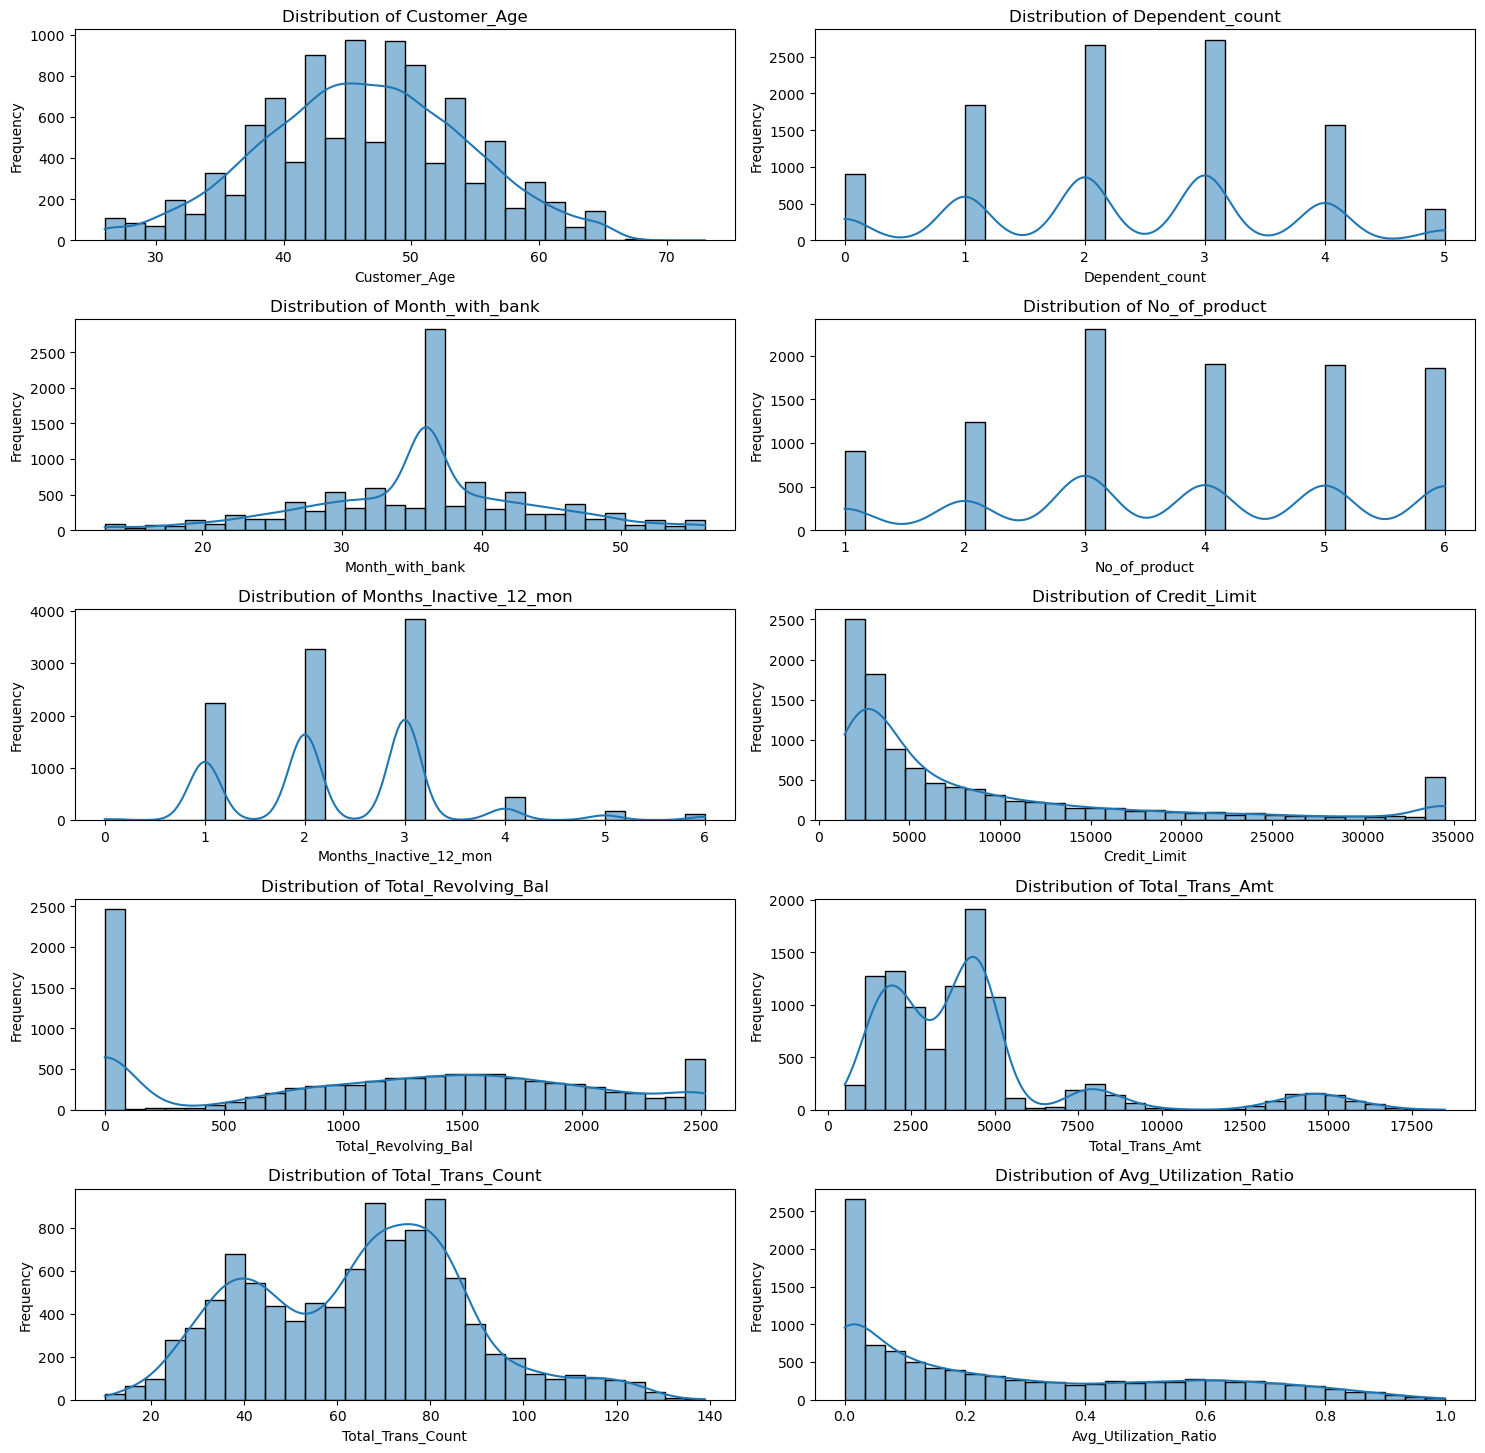

In [101]:
numerical_columns = [
    'Customer_Age', 'Dependent_count', 'Month_with_bank', 'No_of_product',
    'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Count',
    'Avg_Utilization_Ratio'
]

plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_columns):
    plt.subplot(7, 2, i+1)  # Create subplots for each numerical column
    sns.histplot(df[col], bins=30, kde=True)  # Histogram with KDE for better visualization
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation

In [103]:
# some of the numerical columns contains categorical features.
categorical_numerical_columns = ["Dependent_count", "No_of_product",
                                 "Months_Inactive_12_mon"]
numerical_columns_2 = [
    'Customer_Age', 'Month_with_bank','Credit_Limit', 'Total_Revolving_Bal',
    'Total_Trans_Amt', 'Total_Trans_Count', 'Avg_Utilization_Ratio'
] # this removes columns containing categorical features.

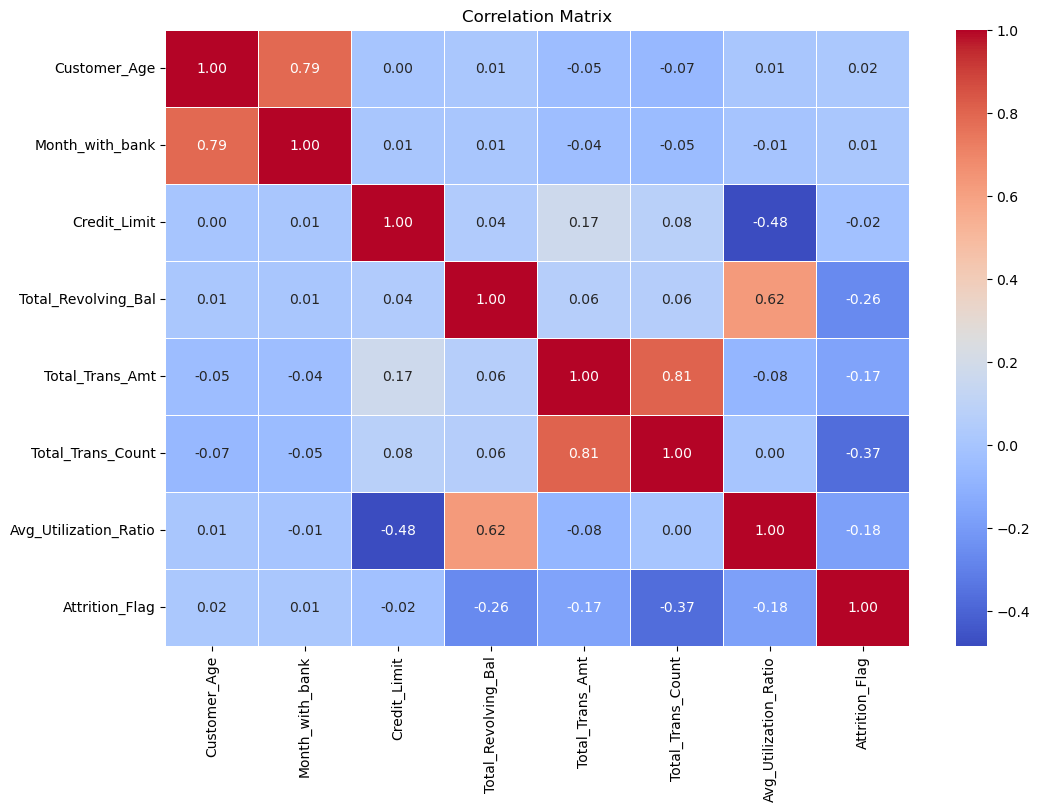

In [104]:
# generating plots to visualise correlation
numerical_df = df[numerical_columns_2].copy()
numerical_df.loc[:, "Attrition_Flag"] = df["Attrition_Flag"]
numerical_df["Attrition_Flag"] = numerical_df["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# very little features with high correlation

### Scaling variables vary in scale

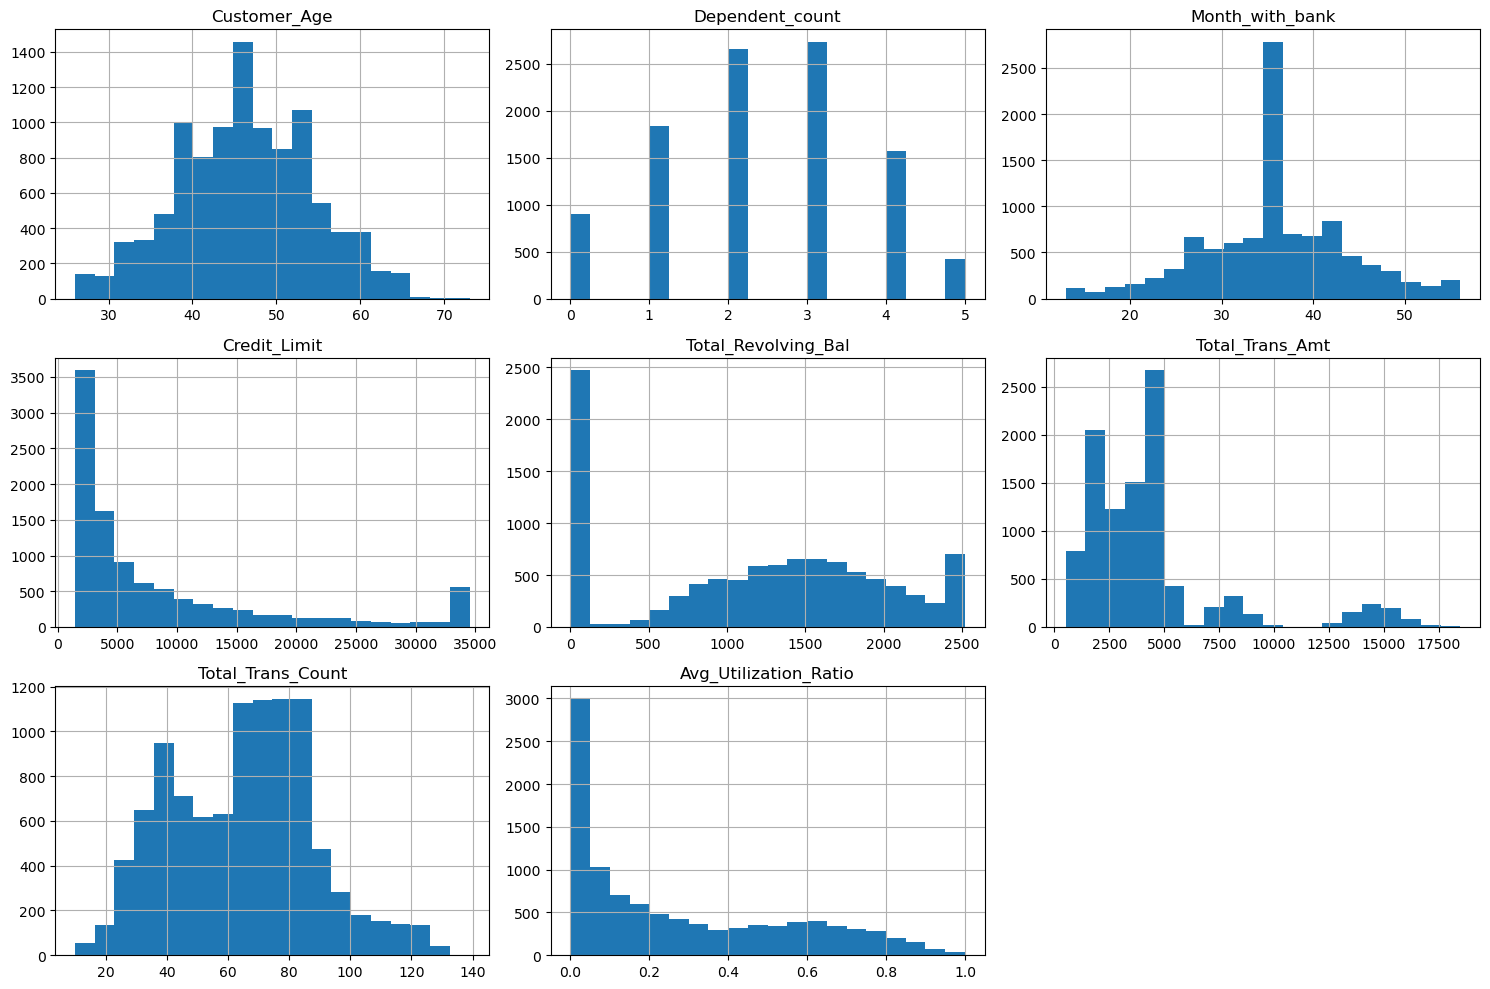

In [109]:
numerical_columns = ['Customer_Age', 'Dependent_count', 'Month_with_bank', 'Credit_Limit',
                     'Total_Revolving_Bal',
                     'Total_Trans_Amt', 'Total_Trans_Count', 'Avg_Utilization_Ratio']

df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [110]:
#apply log transformation(reduce skewness) following normalization for right-skewed distribution column: "Credit_Limit", "Avg_Open_To_Buy", and "Total_Trans_Amt"
#We do not apply log transformation for avg_utilization ratio since its value range(0-10) is alreay suitable for machine learning model
#apply standardization for "Total_Revolving_Bal"
df['Credit_Limit_Log'] = np.log(df['Credit_Limit'] + 1)
df['Total_Trans_Amt_Log'] = np.log(df['Total_Trans_Amt'] + 1)

df.drop(['Total_Trans_Amt', 'Credit_Limit'], axis=1, inplace=True)

min_max_scaler = MinMaxScaler()
df[['Credit_Limit_Log', 'Total_Trans_Amt_Log']] = min_max_scaler.fit_transform(
    df[['Credit_Limit_Log', 'Total_Trans_Amt_Log']]
)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Month_with_bank,No_of_product,Months_Inactive_12_mon,Total_Revolving_Bal,Total_Trans_Count,Avg_Utilization_Ratio,Credit_Limit_Log,Total_Trans_Amt_Log
0,768805383,Existing Customer,45,M,3,High School,Married,60 - 80,Blue,39,5,1,777,42,0.061,0.685116,0.224836
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than 40,Blue,44,6,1,864,33,0.105,0.549809,0.258497
2,713982108,Existing Customer,51,M,3,Graduate,Married,80 - 120,Blue,36,4,1,0,20,0.000,0.272304,0.364208
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than 40,Blue,34,3,4,2517,20,0.760,0.262487,0.231332
4,709106358,Existing Customer,40,M,3,Uneducated,Married,60 - 80,Blue,21,5,1,0,28,0.000,0.373593,0.130776


In [117]:
scaler = StandardScaler()
#We do not standardize the value of ratio, otherwise the value is not fit with reality
numerical_columns_transformed = ['Dependent_count', 'Total_Revolving_Bal','Month_with_bank','Total_Trans_Count']
df[numerical_columns_transformed] = scaler.fit_transform(df[numerical_columns_transformed])
df.head(10)
categorical_columns=['Education_Level','Marital_Status','Card_Category']
#for names in categorical_columns:
  #df = pd.get_dummies(df, columns=names, drop_first=True)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Month_with_bank,No_of_product,Months_Inactive_12_mon,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,Existing Customer,45,M,0.503368,60 - 80,0.384621,5,1,-0.473422,...,True,False,False,False,True,False,False,False,False,False
1,818770008,Existing Customer,49,F,2.043199,Less than 40,1.010715,6,1,-0.366667,...,False,False,False,False,False,True,False,False,False,False
2,713982108,Existing Customer,51,M,0.503368,80 - 120,0.008965,4,1,-1.426858,...,False,False,False,False,True,False,False,False,False,False
3,769911858,Existing Customer,40,F,1.273283,Less than 40,-0.241473,3,4,1.661686,...,True,False,False,False,False,False,True,False,False,False
4,709106358,Existing Customer,40,M,0.503368,60 - 80,-1.869317,5,1,-1.426858,...,False,False,True,False,True,False,False,False,False,False
5,713061558,Existing Customer,44,M,-0.266547,40 - 60,0.008965,3,1,0.103302,...,False,False,False,False,True,False,False,False,False,False
6,810347208,Existing Customer,51,M,1.273283,120 +,1.261152,6,1,1.351236,...,False,False,False,True,True,False,False,True,False,False
7,818906208,Existing Customer,32,M,-1.806378,60 - 80,-1.118005,2,2,0.286136,...,True,False,False,False,False,False,True,False,False,True
8,710930508,Existing Customer,37,M,0.503368,60 - 80,0.008965,5,2,1.661686,...,False,False,True,False,False,True,False,False,False,False
9,719661558,Existing Customer,48,M,-0.266547,80 - 120,0.008965,6,3,0.630944,...,False,False,False,False,False,True,False,False,False,False


In [119]:
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit_Log',
                     'Total_Revolving_Bal', 'Avg_Open_To_Buy_Log', 'Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Amt_Log', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

KeyError: "['Months_on_book', 'Avg_Open_To_Buy_Log', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'] not in index"